In [1]:
import dataframe_image as dfi

ModuleNotFoundError: No module named 'dataframe_image'

In [1]:
frases = '''1. [ ] **Qué voy a escribir? Objetivo**
2. [ ] **Decidir Estilo: Diálogo o Narración o Tweet**
3. [ ] **Planning del desarrollo**
4. [ ] **Desarrollar historia vigilando el esquema 3)**
5. [ ] **Una vez termine, descansar **un día****
6. [ ] **Revisar**
7. [ ] **Ponerle título**
8. [ ] **Publicarlo**'''

import nbformat as nbf
import nbformat.v4 as cell

nb = cell.new_notebook()

for i in frases.splitlines():
    nb['cells'].append(cell.new_markdown_cell(i))
    nb['cells'].append(cell.new_code_cell(''))

with open('new.ipynb', 'w') as notebook:
    nbf.write(nb, notebook)

# Planning

## [X] What to Write? `Target`

- Title: Disecting the Object with Pandas DataFrame Properties

## [X] Choose `Content Type` ↓

- [ ] Tweet
- [ ] Image
- [ ] Video
- [X] Lesson Materials
- [ ] Blog

## [ ] Choose `Style` ↓

- [ ] Dialog
- [X] Narrative

## [ ] Sketch `script`

- regiment data
- creating a DataFrame with a dictionary / creating the instance
    - show the different elements of programming with `tab`
- make a scatterplot
- change color with hue
- make a barplot
- error of not recognizing the column after summarizing the data `groupby`
- disecting the dataframe & series objects
- serie
    - index
    - values
    - how many columns can a series have?
- dataframe
    - multiindex
        - up & down after pivot table
        - left after groupby
    - no multiindex index
- what is the best option between 3?
    - series
    - df_series
    - df_series_reset_index
- what if we pass data to visualize?
- 

## [ ] `Develop` script watching previous step

# Development

## Load the Data

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Make a simple `scatterplot()`

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

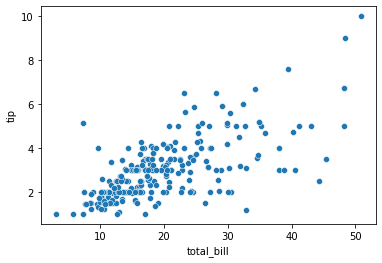

In [4]:
sns.scatterplot(x='total_bill', y='tip', data=df)

## How many tables were booked each `day`?

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.day

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [7]:
res = df.day.value_counts()

In [8]:
res

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### Disecting the Object into Pieces

In [9]:
res.index

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

In [10]:
res.values

array([87, 76, 62, 19])

In [11]:
res.name

'day'

In [12]:
res.dtypes

dtype('int64')

### Using each piece to properly create a `barplot()`

<AxesSubplot:>

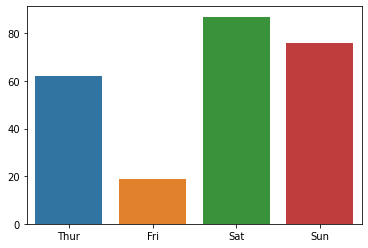

In [13]:
sns.barplot(x=res.index, y=res.values)

## `scatterplot()` with 3 variables

> - Add one column to change the color of the points
> - according to the category value `scatterplot(hue=?)`

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

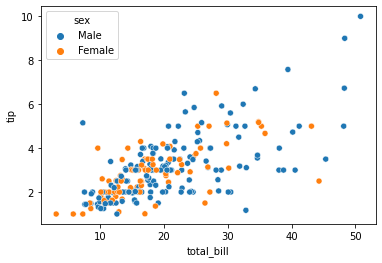

In [14]:
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex')

## `barplot()` with 3 variables

> - Add one column to change the color of the points
> - according to the category value `scatterplot(hue=?)`

<AxesSubplot:xlabel='size', ylabel='total_bill'>

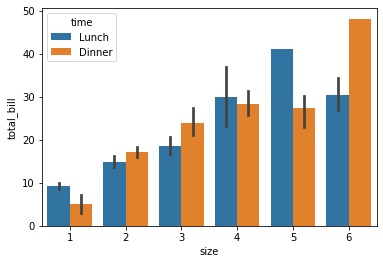

In [15]:
sns.barplot(x='size', y='total_bill', hue='time', data=df)

### Calculate the numbers with `functions()` of the `DataFrame`

In [16]:
res = df.groupby(by=['size', 'time']).total_bill.mean()

In [17]:
res

size  time  
1     Lunch      9.325000
      Dinner     5.160000
2     Lunch     14.886731
      Dinner    17.228654
3     Lunch     18.524000
      Dinner    23.997879
4     Lunch     29.950000
      Dinner    28.404688
5     Lunch     41.190000
      Dinner    27.287500
6     Lunch     30.383333
      Dinner    48.170000
Name: total_bill, dtype: float64

### Create the `barplot()` with the previous `object`

In [18]:
sns.scatterplot(x='size', y='total_bill', hue='time', data=res)

ValueError: Could not interpret value `total_bill` for parameter `y`

> - Can you access just this column?

In [19]:
res['total_bill']

KeyError: 'total_bill'

> - Why does it gives you an error on `total_bill`?

In [20]:
res

size  time  
1     Lunch      9.325000
      Dinner     5.160000
2     Lunch     14.886731
      Dinner    17.228654
3     Lunch     18.524000
      Dinner    23.997879
4     Lunch     29.950000
      Dinner    28.404688
5     Lunch     41.190000
      Dinner    27.287500
6     Lunch     30.383333
      Dinner    48.170000
Name: total_bill, dtype: float64

> - Will it happen the same on `time` and `size`?

In [21]:
res['size']

KeyError: 'size'

In [22]:
res['time']

KeyError: 'time'

In [23]:
res

size  time  
1     Lunch      9.325000
      Dinner     5.160000
2     Lunch     14.886731
      Dinner    17.228654
3     Lunch     18.524000
      Dinner    23.997879
4     Lunch     29.950000
      Dinner    28.404688
5     Lunch     41.190000
      Dinner    27.287500
6     Lunch     30.383333
      Dinner    48.170000
Name: total_bill, dtype: float64

> - How can you then access the `values`?

In [24]:
res.values

array([ 9.325     ,  5.16      , 14.88673077, 17.22865385, 18.524     ,
       23.99787879, 29.95      , 28.4046875 , 41.19      , 27.2875    ,
       30.38333333, 48.17      ])

> - And just the values of `size` and `time`?

In [25]:
res.index

MultiIndex([(1,  'Lunch'),
            (1, 'Dinner'),
            (2,  'Lunch'),
            (2, 'Dinner'),
            (3,  'Lunch'),
            (3, 'Dinner'),
            (4,  'Lunch'),
            (4, 'Dinner'),
            (5,  'Lunch'),
            (5, 'Dinner'),
            (6,  'Lunch'),
            (6, 'Dinner')],
           names=['size', 'time'])

> - Apply intuition with basic notions of python

In [26]:
res.index.get_level_values('size')

Int64Index([1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6], dtype='int64', name='size')

In [27]:
res.index.get_level_values('time')

CategoricalIndex(['Lunch', 'Dinner', 'Lunch', 'Dinner', 'Lunch', 'Dinner',
                  'Lunch', 'Dinner', 'Lunch', 'Dinner', 'Lunch', 'Dinner'],
                 categories=['Lunch', 'Dinner'], ordered=False, dtype='category', name='time')

> - Could you pass the above lines of `code` to the `parameters`
> - so that it will access the specific information
> - for the `barplot()`

<AxesSubplot:xlabel='size'>

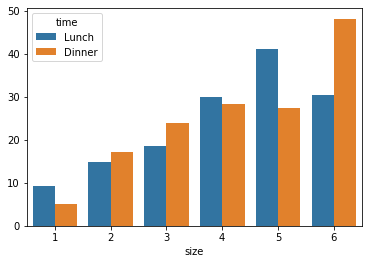

In [28]:
sns.barplot(x=res.index.get_level_values('size'), y=res.values, hue=res.index.get_level_values('time'))

### An easier way

> - We previously made it easier...

<AxesSubplot:xlabel='size', ylabel='total_bill'>

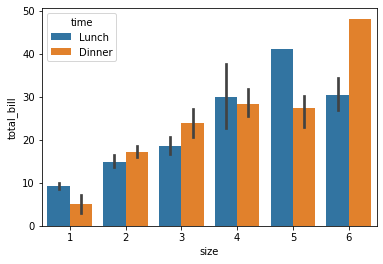

In [29]:
sns.barplot(x='size', y='total_bill', hue='time', data=df)

> - Why?
> - Because of the `DataFrame` properties
> - You can store the **data** into `multiple` columns
> - I mean, the `DataFrame` is a set of `Series`

In [30]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> - So, how can we turn this ...

In [31]:
res

size  time  
1     Lunch      9.325000
      Dinner     5.160000
2     Lunch     14.886731
      Dinner    17.228654
3     Lunch     18.524000
      Dinner    23.997879
4     Lunch     29.950000
      Dinner    28.404688
5     Lunch     41.190000
      Dinner    27.287500
6     Lunch     30.383333
      Dinner    48.170000
Name: total_bill, dtype: float64

> - Into something like this ↓

![](dfres.png)

In [32]:
dfres = res.to_frame()

In [33]:
dfres

total_bill
size time              
1    Lunch     9.325000
     Dinner    5.160000
2    Lunch    14.886731
     Dinner   17.228654
3    Lunch    18.524000
     Dinner   23.997879
4    Lunch    29.950000
     Dinner   28.404688
5    Lunch    41.190000
     Dinner   27.287500
6    Lunch    30.383333
     Dinner   48.170000

In [34]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='size', ylabel='total_bill'>

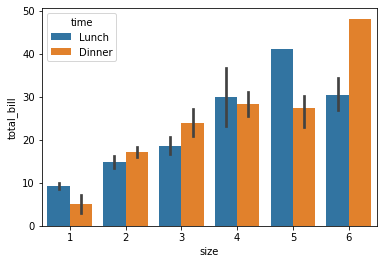

In [35]:
sns.barplot(x='size', y='total_bill', hue='time', data=df)

> - Can we now make the `barplot()`?

In [36]:
sns.barplot(x='size', y='total_bill', hue='time', data=dfres)

ValueError: Could not interpret input 'size'

> - Why cannot interpret the `size` if it's a column?

In [37]:
dfres

total_bill
size time              
1    Lunch     9.325000
     Dinner    5.160000
2    Lunch    14.886731
     Dinner   17.228654
3    Lunch    18.524000
     Dinner   23.997879
4    Lunch    29.950000
     Dinner   28.404688
5    Lunch    41.190000
     Dinner   27.287500
6    Lunch    30.383333
     Dinner   48.170000

> - Or it really isn't?

In [38]:
df_res['size']

NameError: name 'df_res' is not defined

In [39]:
dfres

total_bill
size time              
1    Lunch     9.325000
     Dinner    5.160000
2    Lunch    14.886731
     Dinner   17.228654
3    Lunch    18.524000
     Dinner   23.997879
4    Lunch    29.950000
     Dinner   28.404688
5    Lunch    41.190000
     Dinner   27.287500
6    Lunch    30.383333
     Dinner   48.170000

> - Remember that we have
> 1. `columns` → (vertical)
> 2. `index` → rows (horizontal)

In [40]:
dfres.index

MultiIndex([(1,  'Lunch'),
            (1, 'Dinner'),
            (2,  'Lunch'),
            (2, 'Dinner'),
            (3,  'Lunch'),
            (3, 'Dinner'),
            (4,  'Lunch'),
            (4, 'Dinner'),
            (5,  'Lunch'),
            (5, 'Dinner'),
            (6,  'Lunch'),
            (6, 'Dinner')],
           names=['size', 'time'])

In [41]:
dfres.values

array([[ 9.325     ],
       [ 5.16      ],
       [14.88673077],
       [17.22865385],
       [18.524     ],
       [23.99787879],
       [29.95      ],
       [28.4046875 ],
       [41.19      ],
       [27.2875    ],
       [30.38333333],
       [48.17      ]])

> - The, how in hell they could reproduce the `barplot`?

<AxesSubplot:xlabel='size', ylabel='total_bill'>

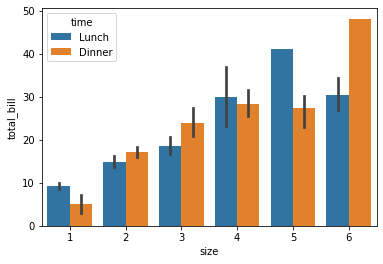

In [42]:
sns.barplot(x='size', y='total_bill', hue='time', data=df)

> - Because the `size` was a `column`
> - **not an index**

In [50]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [51]:
res.to_frame()

total_bill
size time              
1    Lunch     9.325000
     Dinner    5.160000
2    Lunch    14.886731
     Dinner   17.228654
3    Lunch    18.524000
     Dinner   23.997879
4    Lunch    29.950000
     Dinner   28.404688
5    Lunch    41.190000
     Dinner   27.287500
6    Lunch    30.383333
     Dinner   48.170000

> - [ ] Could we **transform** the `index` to a `column`

In [52]:
dfres_reset = res.reset_index()

In [55]:
dfres_reset

,size,time,total_bill
0,1,Lunch,9.325000
1,1,Dinner,5.160000
2,2,Lunch,14.886731
3,2,Dinner,17.228654
4,3,Lunch,18.524000
5,3,Dinner,23.997879
6,4,Lunch,29.950000
7,4,Dinner,28.404688
8,5,Lunch,41.190000
9,5,Dinner,27.287500


> - [ ] Will the `size` be recognisable **as a column** now?

<AxesSubplot:xlabel='size', ylabel='total_bill'>

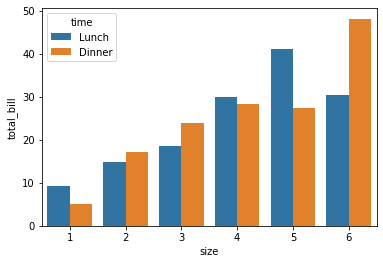

In [56]:
sns.barplot(x='size', y='total_bill', hue='time', data=dfres_reset)

In [58]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='size', ylabel='total_bill'>

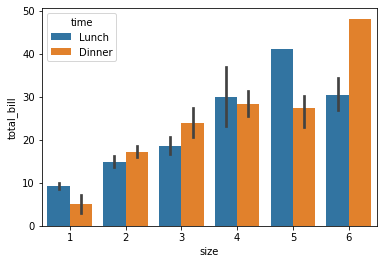

In [57]:
sns.barplot(x='size', y='total_bill', hue='time', data=df)

## Recap

### The multindexed `Series`

In [68]:
type(res)

pandas.core.series.Series

In [69]:
res

size  time  
1     Lunch      9.325000
      Dinner     5.160000
2     Lunch     14.886731
      Dinner    17.228654
3     Lunch     18.524000
      Dinner    23.997879
4     Lunch     29.950000
      Dinner    28.404688
5     Lunch     41.190000
      Dinner    27.287500
6     Lunch     30.383333
      Dinner    48.170000
Name: total_bill, dtype: float64

### The multindexed `DataFrame`

In [70]:
type(dfres)

pandas.core.frame.DataFrame

In [71]:
dfres

total_bill
size time              
1    Lunch     9.325000
     Dinner    5.160000
2    Lunch    14.886731
     Dinner   17.228654
3    Lunch    18.524000
     Dinner   23.997879
4    Lunch    29.950000
     Dinner   28.404688
5    Lunch    41.190000
     Dinner   27.287500
6    Lunch    30.383333
     Dinner   48.170000

### The re `DataFrame`

In [64]:
type(dfres_reset)

pandas.core.frame.DataFrame

In [65]:
dfres_reset

,size,time,total_bill
0,1,Lunch,9.325000
1,1,Dinner,5.160000
2,2,Lunch,14.886731
3,2,Dinner,17.228654
4,3,Lunch,18.524000
5,3,Dinner,23.997879
6,4,Lunch,29.950000
7,4,Dinner,28.404688
8,5,Lunch,41.190000
9,5,Dinner,27.287500


In [ ]:
#Copy Paste Sketch **HERE**

## [ ] Put the `script to rest` for a day

## [ ] Review

In [ ]:
#Copy Paste Complete Script **HERE**

## [ ] Final `Title` ↓

## [ ] Tags:

1. Machine Learning
2. Data Science
3. Data Visualization
4. Python
5. Pandas

## [ ] Publish

In [25]:
!jupyter nbconvert -TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}' -TagRemovePreprocessor.remove_all_outputs_tags='{"remove_output"}' \
    -TagRemovePreprocessor.remove_input_tags='{"remove_input"}' --to markdown script.ipynb

[NbConvertApp] Converting notebook script.ipynb to markdown
[NbConvertApp] Support files will be in script_files/
[NbConvertApp] Making directory script_files
[NbConvertApp] Making directory script_files
[NbConvertApp] Writing 4640 bytes to script.md
